In [59]:
from sklearn import datasets, svm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
digits = datasets.load_digits()
svc = svm.SVC(C=1.0, kernel='linear').fit(X=digits.data[:-100], y=digits.target[:-100])
svc.score(X=digits.data[-100:], y=digits.target[-100:])

0.98

In [31]:
X_folds = np.array_split(digits.data, 3)
y_folds = np.array_split(digits.target, 3)
def threefoldCV(i):
    def splitdata(folds):
        data = folds.copy()
        test = data.pop(i)
        train = np.concatenate(data)
        d = {'train': train, 'test': test}
        return(d)
    X = splitdata(X_folds)
    y = splitdata(y_folds)
    svc = svm.SVC(C=1.0, kernel='linear')
    score = svc.fit(X=X['train'], y=y['train']).score(X=X['test'], y=y['test'])
    return(score)

[threefoldCV(i) for i in range(3)]

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

In [52]:
from sklearn.model_selection import KFold, cross_val_score
def train_score(trainix, testix, dataset, estimator):
    X_train = dataset.data[trainix]
    X_test = dataset.data[testix]
    y_train = dataset.target[trainix]
    y_test = dataset.target[testix]
    estimator.fit(X=X_train, y=y_train)
    score = estimator.score(X=X_test, y=y_test)
    return(score)

svc = svm.SVC(1.0, kernel='linear')
fivefold = KFold(n_splits=5)
[train_score(train, test, digits, svc) for train, test in fivefold.split(digits.data)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [53]:
svc = svm.SVC(1.0, kernel='linear')
cross_val_score(estimator=svc, X=digits.data, y=digits.target, cv=fivefold)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

### Exercise

On the digits dataset, plot the cross-validation score of a [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10)

In [101]:
xx = 10.0 ** (np.linspace(-10, 0, 100))
scores = [cross_val_score(estimator=svm.SVC(C, kernel='linear'), X=digits.data, y=digits.target, cv=fivefold, n_jobs=-1) for C in xx]

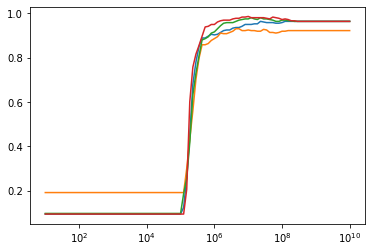

In [107]:
yy = np.array(scores)
fig, ax = plt.subplots(1)
for i in range(4):
    ax.plot(np.logspace(1, 10, 100), yy[:,i])
ax.set_xscale('log')

In [3]:
%connect_info

{
  "shell_port": 59433,
  "iopub_port": 42303,
  "stdin_port": 34729,
  "control_port": 39771,
  "hb_port": 34959,
  "ip": "127.0.0.1",
  "key": "69bee391-ff60708e40146137d0981604",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-00725e2c-fa6a-4093-8a59-07a5b38bf085.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
